In [1]:
%matplotlib inline
import math as m
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Gerar a função que queremos modelar.

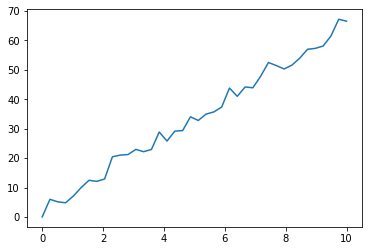

In [2]:
func = 1
N = 40
X = np.linspace(0, 10, N)
Y = []
for x in X:
   if (func==1):
      Y.append(2*m.pi*x+(2.5*rd.random())**2); TClass = 5   
   if (func==2):
      Y.append(2*m.sin(m.pi*x**2+5*x)); TClass = 0.1
   if (func==3):
      Y.append(2*m.sin(m.pi*(4*x)**3+5*x)); TClass = 0.1
   if (func==4):
      Y.append(2*m.sin(m.pi*(4*x)**3+5*x)); TClass = 0.05
plt.plot(X, Y, '-')
plt.show()

In [3]:
K = m.ceil((max(Y)-min(Y)/TClass))
print('K =',K)

def getZ(Y, K): 
  Z = []
  Min = min(Y); Max = max(Y)
  for y in Y:
    val2class = int(round((K-1)*(y-Min)/(Max-Min),0))
    Z.append(val2class)
  return Z

def getW(Z, Y, K): 
  W = []
  Min = min(Y); Max = max(Y)
  for z in Z:
    class2val = Min+z*(Max-Min)/(K-1)
    W.append(class2val)
  return W

def RMSE(X,Y):
  V = 0; sz = len(X)
  for i in range(sz):
    V += 1/sz*(X[i]-Y[i])**2
  return V**(1/2)

Z = getZ(Y, K)
W = getW(Z, Y, K)
print("Y =",Y)
print("Z =",Z)
print("W =",W)
print("RMSE =",RMSE(Y,W))

K = 68
Y = [0.03458057103800665, 6.01896830133141, 5.152693865446717, 4.846222050680625, 7.1317858970278305, 10.020374930207117, 12.472501243932273, 12.108415616313982, 12.91834417998848, 20.466399003475505, 21.03735782942529, 21.21773631111877, 22.976516085525965, 22.19040346159475, 22.949628704598915, 28.869284851230212, 25.820552605844533, 29.187449042984035, 29.3653562982174, 34.036296162682575, 32.80854272889356, 34.96445972562595, 35.704971319371225, 37.35437279098975, 43.809268662192096, 41.01377601784853, 44.173757808880644, 43.904427520856025, 47.85952630952258, 52.49148029967866, 51.45297275381115, 50.29921766444922, 51.60868917240297, 53.94348467796618, 56.97758304952206, 57.2986016855727, 58.09592906013641, 61.4834394346485, 67.19216064184047, 66.5289105597796]
Z = [0, 6, 5, 5, 7, 10, 12, 12, 13, 20, 21, 21, 23, 22, 23, 29, 26, 29, 29, 34, 33, 35, 36, 37, 44, 41, 44, 44, 48, 52, 51, 50, 51, 54, 57, 57, 58, 61, 67, 66]
W = [0.03458057103800665, 6.048692219169571, 5.046340277

In [4]:
way = 2
prev = 4

def getP(Z, K, j):
  P = np.zeros((K,K))
  for i in range(j,len(Z)-2):
    P[Z[i-j],Z[i]] += 1
  S = P.sum(axis=1)
  for i in range(K):
    for j in range(K):
      if (S[i]!=0):
        P[i,j] = P[i,j] / S[i]
  return P

P = getP(Z, K , 1)
print(P)

if (way==0):
  P2 = P
  P3 = P
  P4 = P

if (way==1):
  print("P2 = P^2")
  P2 = np.matmul(P,P)
  print("P3 = P^3")
  P3 = np.matmul(P2,P)
  print("P4 = P^4")
  P4 = np.matmul(P3,P)

if (way==2):
  print("P2 = P[Z[i-2],Z[i]]")
  P2 = getP(Z,K,2)
  print("P3 = P[Z[i-3],Z[i]]")
  P3 = getP(Z,K,3)
  print("P4 = P[Z[i-4],Z[i]]")
  P4 = getP(Z,K,4)

if (prev==1):
  u1 = 1; u2 = 0; u3 = 0; u4 = 0
if (prev==2):
  u1 = 1; u2 = 1; u3 = 0; u4 = 0
if (prev==3):
  u1 = 1; u2 = 1; u3 = 1; u4 = 0
if (prev==4):
  u1 = 1; u2 = 1; u3 = 1; u4 = 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
P2 = P[Z[i-2],Z[i]]
P3 = P[Z[i-3],Z[i]]
P4 = P[Z[i-4],Z[i]]


PMData = 3.475
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
ERROR PERC. = 0.05555555555555555


/var/folders/_l/6yn52l4165j2hbxlxj7ct8640000gn/T/ipykernel_40868/980089551.py:14: RuntimeWarning: invalid value encountered in double_scalars
  R[i] = min(u1, M1[i])/max(M1)


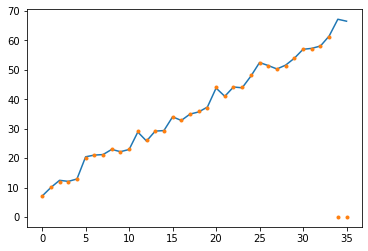

RMSE = 15.752856795651981


In [5]:
def predict(Y,Z):
  ZPRED = []; YREAL = []; ERRO = []
  for j in range(4,N):
    v4 = Z[j-4]; v3 = Z[j-3]; v2 = Z[j-2]; v1 = Z[j-1]; v0 = Z[j]
    #print(v4,v3,v2,v1,v0)

    # I want to predict v0
    M4 = P4[v4,:]; M3 = P3[v3,:]; M2 = P2[v2,:]; M1 = P[v1,:] 
    #print(M0); print(M1); print(M2); print(M3)
    #print("")
    #print("Prediction Prob ",u1,u2,u3,u4)
    R = np.zeros(len(M1))
    for i in range(len(M1)):             
      R[i] = min(u1, M1[i])/max(M1)
      if (u2>0 and M2.sum()>0.0):
        R[i] *= M2[i]/max(M2)
      if (u3>0 and M3.sum()>0.0):
        R[i] *= M3[i]/max(M3)
      if (u4>0 and M4.sum()>0.0):
        R[i] *= M4[i]/max(M4)
    #print(R)
    #print("v0 =",v0," pv0 =",np.argmax(R))
    YREAL.append(Y[j])
    ZPRED.append(np.argmax(R))
    if (v0==np.argmax(R)):
      ERRO.append(0)
    else:
      ERRO.append(1)

  print("PMData =", (u1*np.count_nonzero(P)+u2*np.count_nonzero(P2)+u3*np.count_nonzero(P3)+u4*np.count_nonzero(P4))/N)
  print(ERRO)
  print("ERROR PERC. =",sum(ERRO)/len(ERRO))

  X = range(len(YREAL))
  YPRED = getW(ZPRED,Y,K)
  plt.plot(X, YREAL, '-')
  plt.plot(X, YPRED, '.')
  plt.show()

  print("RMSE =",RMSE(YREAL,YPRED))

predict(Y,Z)

40 40


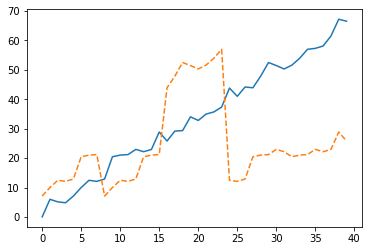

/var/folders/_l/6yn52l4165j2hbxlxj7ct8640000gn/T/ipykernel_40868/980089551.py:14: RuntimeWarning: invalid value encountered in double_scalars
  R[i] = min(u1, M1[i])/max(M1)


PMData = 3.475
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ERROR PERC. = 0.9722222222222222


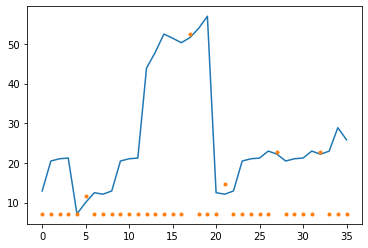

RMSE = 22.121476186726504



In [6]:
G = []; NN = 2
for _ in range(m.ceil(10/NN)-1):
  i = rd.randint(0,N-4*NN)
  for j in range(4*NN):
    G.append(Y[i+j])
i = rd.randint(0,N-4*NN)
sz = len(G)
for j in range(i,i+N-sz):
  G.append(Y[j])
print(len(Y),len(G))
plt.plot(range(N), Y, '-')
plt.plot(range(N), G, '--')
plt.show()

predict(G,getZ(G,K))
print("")